In [1]:
import tensorflow as tf
# assert tf.__version__.startswith('2')
print(tf.__version__)

2.6.4


In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# cek penggunaan GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-11-02 09:54:17.873432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 09:54:17.874397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 09:54:17.875271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 09:54:17.876091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 09:54:17.876885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [64]:
datasets = '/kaggle/input/eye-gender-dataset/eye_gender_data'
train_path = os.path.join(datasets, 'train')
test_path = os.path.join(datasets, 'test')
print(train_path, test_path)
print()

for dirname, _, filenames in os.walk(datasets):
    print(dirname+"\t len file : "+str(len(filenames)))

/kaggle/input/eye-gender-dataset/eye_gender_data/train /kaggle/input/eye-gender-dataset/eye_gender_data/test

/kaggle/input/eye-gender-dataset/eye_gender_data	 len file : 3
/kaggle/input/eye-gender-dataset/eye_gender_data/test	 len file : 2305
/kaggle/input/eye-gender-dataset/eye_gender_data/train	 len file : 9220


In [ ]:
# import os
# for dirname, _, filenames in os.walk('../input/eye-gender-dataset/eye_gender_data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [334]:
train_data = pd.read_csv(os.path.join(datasets, 'Training_set.csv'))
test_data = pd.read_csv(os.path.join(datasets, 'Testing_set.csv'))

print(train_data.head())
print(test_data.head())

      filename   label
0  Image_1.jpg    male
1  Image_2.jpg  female
2  Image_3.jpg  female
3  Image_4.jpg  female
4  Image_5.jpg    male
      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg


In [335]:
class_names = train_data['label'].unique().tolist()
class_names

['male', 'female']

Image_2.jpg
- Number of Pixels: 10092
- Shape/Dimensions: (58, 58, 3)


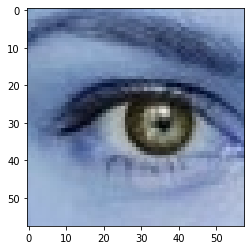

In [336]:
import cv2

file = train_data['filename'][1]
img = cv2.imread(os.path.join(train_path, file))

print(file)
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))
plt.imshow(img)

- Number of Pixels: 3364
- Shape/Dimensions: (58, 58)


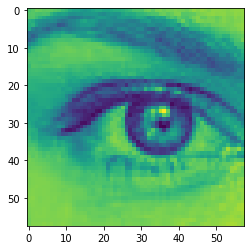

In [337]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
print("- Number of Pixels: " + str(gray_img.size))
print("- Shape/Dimensions: " + str(gray_img.shape))

- Number of Pixels: 3364
- Shape/Dimensions: (58, 58)


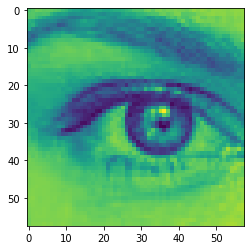

In [338]:
# reshape for feeding into the model
img_re = cv2.resize(gray_img, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)

plt.imshow(gray_img)
print("- Number of Pixels: " + str(gray_img.size))
print("- Shape/Dimensions: " + str(gray_img.shape))

In [339]:
for i, file in enumerate(train_data['filename']):
    if i==10:
        break
    img = cv2.imread(os.path.join(train_path, file))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("- Number of Pixels: " + str(gray_img.size))
    print("- Shape/Dimensions: " + str(gray_img.shape))

- Number of Pixels: 2809
- Shape/Dimensions: (53, 53)
- Number of Pixels: 3364
- Shape/Dimensions: (58, 58)
- Number of Pixels: 3481
- Shape/Dimensions: (59, 59)
- Number of Pixels: 3249
- Shape/Dimensions: (57, 57)
- Number of Pixels: 5184
- Shape/Dimensions: (72, 72)
- Number of Pixels: 3136
- Shape/Dimensions: (56, 56)
- Number of Pixels: 3025
- Shape/Dimensions: (55, 55)
- Number of Pixels: 1936
- Shape/Dimensions: (44, 44)
- Number of Pixels: 3969
- Shape/Dimensions: (63, 63)
- Number of Pixels: 3249
- Shape/Dimensions: (57, 57)


In [340]:
df.shape[0]

9220

In [341]:
import cv2
df = train_data.copy()
image = np.zeros((df.shape[0],25*25))
for i, im in enumerate(df['filename']):
    img = cv2.imread(os.path.join(train_path, im))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_re = cv2.resize(gray_img, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)
    image[i] = img_re.flatten()
    
image.shape

(9220, 625)

In [401]:
# insert px image
gbr = pd.DataFrame(image, columns=[f'px{c+1}' for c in range(image.shape[1])])
train_data = pd.concat([df, gbr], axis = 1)
train_data.drop('filename', axis=1, inplace=True)

# encode label
train_data['label'].replace(
    ['male', 'female'],
    [0, 1], inplace=True
)

train_data

,label,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px616,px617,px618,px619,px620,px621,px622,px623,px624,px625
0,0,189.0,181.0,193.0,199.0,198.0,195.0,185.0,185.0,187.0,...,162.0,160.0,161.0,171.0,176.0,176.0,174.0,174.0,174.0,166.0
1,1,172.0,172.0,170.0,147.0,143.0,128.0,125.0,132.0,122.0,...,187.0,189.0,193.0,194.0,189.0,192.0,192.0,198.0,201.0,198.0
2,1,174.0,171.0,171.0,171.0,167.0,171.0,169.0,162.0,161.0,...,137.0,130.0,129.0,127.0,130.0,128.0,125.0,119.0,109.0,96.0
3,1,100.0,104.0,108.0,80.0,66.0,82.0,104.0,103.0,92.0,...,174.0,178.0,164.0,172.0,176.0,179.0,173.0,169.0,163.0,155.0
4,0,181.0,164.0,140.0,163.0,159.0,134.0,134.0,105.0,82.0,...,174.0,178.0,176.0,177.0,181.0,182.0,184.0,184.0,187.0,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,0,197.0,195.0,195.0,194.0,193.0,193.0,195.0,196.0,194.0,...,176.0,176.0,177.0,178.0,178.0,176.0,181.0,180.0,182.0,184.0
9216,0,159.0,171.0,172.0,165.0,151.0,146.0,129.0,142.0,158.0,...,165.0,164.0,162.0,153.0,155.0,127.0,103.0,90.0,87.0,87.0
9217,0,193.0,177.0,145.0,140.0,120.0,119.0,120.0,112.0,129.0,...,165.0,162.0,156.0,155.0,157.0,152.0,153.0,153.0,153.0,153.0
9218,0,142.0,135.0,128.0,113.0,106.0,95.0,113.0,94.0,88.0,...,117.0,124.0,133.0,157.0,159.0,155.0,146.0,151.0,159.0,178.0


Text(0.5, 1.0, '0')

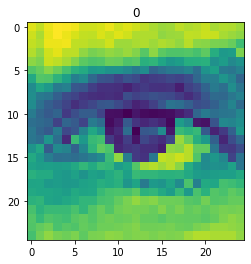

In [404]:
plt.imshow(image[0].reshape(25, 25))
plt.title(train_data['label'][0])

In [411]:
#split dataset
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_data, test_size=0.2)

train.shape, val.shape

((7376, 626), (1844, 626))

In [412]:
X_train = train.drop('label',axis=1).values
y_train = train['label'].values

X_val = val.drop('label',axis=1).values
y_val = val['label'].values

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((7376, 625), (7376,), (1844, 625), (1844,))

In [413]:
X_train=X_train.reshape(-1,25,25,1)
X_val=X_val.reshape(-1,25,25,1)

print(X_train.shape)
print(X_val.shape)

(7376, 25, 25, 1)
(1844, 25, 25, 1)


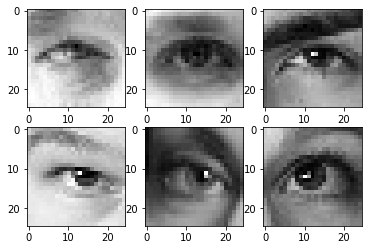

In [414]:
col, bar = 3, 2

fig,axe=plt.subplots(bar,col)
idx = 0
for i in range(bar):
    for j in range(col):
        axe[i,j].imshow(X_train[idx].reshape(25,25),cmap='gray')
        idx+=1

In [415]:
X_train = X_train.astype('float32')
X_train = X_train/255*2-1

X_val = X_val.astype('float32')
X_val = X_val/255*2-1

X_train.min(), X_train.max()

(-1.0, 1.0)

In [416]:
# define input shape
INPUT_SHAPE = (25, 25, 1)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
    activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
    activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

# compile model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 23, 23, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [417]:
EPOCHS = 25

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,
    restore_best_weights=True,
    verbose=1)

In [418]:
# with tf.device('/gpu:0'):
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    callbacks=[es_callback],
    validation_split=0.1, 
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/25


2022-11-02 14:42:44.862568: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


208/208 [==============================] - 15s 5ms/step - loss: 0.5167 - accuracy: 0.7444 - val_loss: 0.3854 - val_accuracy: 0.8293
Epoch 2/25
208/208 [==============================] - 1s 4ms/step - loss: 0.3671 - accuracy: 0.8436 - val_loss: 0.3090 - val_accuracy: 0.8591
Epoch 3/25
208/208 [==============================] - 1s 4ms/step - loss: 0.3112 - accuracy: 0.8698 - val_loss: 0.2719 - val_accuracy: 0.8726
Epoch 4/25
208/208 [==============================] - 1s 4ms/step - loss: 0.2758 - accuracy: 0.8817 - val_loss: 0.2776 - val_accuracy: 0.8686
Epoch 5/25
208/208 [==============================] - 1s 4ms/step - loss: 0.2439 - accuracy: 0.8994 - val_loss: 0.2694 - val_accuracy: 0.8848
Epoch 6/25
208/208 [==============================] - 1s 5ms/step - loss: 0.2245 - accuracy: 0.9090 - val_loss: 0.2991 - val_accuracy: 0.8726
Epoch 7/25
208/208 [==============================] - 1s 4ms/step - loss: 0.1905 - accuracy: 0.9209 - val_loss: 0.2620 - val_accuracy: 0.8862
Epoch 8/25
208/2